In [7]:
import pandas as pd

# Load the CSV files into DataFrames
daily_activity = pd.read_csv('/content/drive/MyDrive/CABA - M3 - Data Analysis/Chapter 10/Final Project/dailyActivity_merged.csv')
daily_calories = pd.read_csv('/content/drive/MyDrive/CABA - M3 - Data Analysis/Chapter 10/Final Project/dailyCalories_merged.csv')
daily_intensities = pd.read_csv('/content/drive/MyDrive/CABA - M3 - Data Analysis/Chapter 10/Final Project/dailyIntensities_merged.csv')
daily_steps = pd.read_csv('/content/drive/MyDrive/CABA - M3 - Data Analysis/Chapter 10/Final Project/dailySteps_merged.csv')
sleep_day = pd.read_csv('/content/drive/MyDrive/CABA - M3 - Data Analysis/Chapter 10/Final Project/sleepDay_merged.csv')
weight_log = pd.read_csv('/content/drive/MyDrive/CABA - M3 - Data Analysis/Chapter 10/Final Project/weightLogInfo_merged.csv')

# Display the first few rows and columns for each DataFrame
daily_activity.info()
daily_calories.info()
daily_intensities.info()
daily_steps.info()
sleep_day.info()
weight_log.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [8]:
daily_activity.head(), daily_calories.head(),daily_intensities.head(),daily_steps.head(),sleep_day.head(),weight_log.head()

(           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
 0  1503960366    4/12/2016       13162           8.50             8.50   
 1  1503960366    4/13/2016       10735           6.97             6.97   
 2  1503960366    4/14/2016       10460           6.74             6.74   
 3  1503960366    4/15/2016        9762           6.28             6.28   
 4  1503960366    4/16/2016       12669           8.16             8.16   
 
    LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
 0                       0.0                1.88                      0.55   
 1                       0.0                1.57                      0.69   
 2                       0.0                2.44                      0.40   
 3                       0.0                2.14                      1.26   
 4                       0.0                2.71                      0.41   
 
    LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
 0     

In [9]:
# Convert date columns to datetime format and check for missing values in each dataset

# Convert 'ActivityDate' in daily_activity
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

# Convert 'ActivityDay' in daily_calories and daily_intensities
daily_calories['ActivityDay'] = pd.to_datetime(daily_calories['ActivityDay'])
daily_intensities['ActivityDay'] = pd.to_datetime(daily_intensities['ActivityDay'])

# Convert 'ActivityDay' in daily_steps
daily_steps['ActivityDay'] = pd.to_datetime(daily_steps['ActivityDay'])

# Convert 'SleepDay' in sleep_day
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])

# Convert 'Date' in weight_log
weight_log['Date'] = pd.to_datetime(weight_log['Date'])

# Check for missing values in each dataset
missing_values = {
    "daily_activity": daily_activity.isnull().sum(),
    "daily_calories": daily_calories.isnull().sum(),
    "daily_intensities": daily_intensities.isnull().sum(),
    "daily_steps": daily_steps.isnull().sum(),
    "sleep_day": sleep_day.isnull().sum(),
    "weight_log": weight_log.isnull().sum()
}

# Check for duplicated rows in each dataset
duplicates = {
    "daily_activity": daily_activity.duplicated().sum(),
    "daily_calories": daily_calories.duplicated().sum(),
    "daily_intensities": daily_intensities.duplicated().sum(),
    "daily_steps": daily_steps.duplicated().sum(),
    "sleep_day": sleep_day.duplicated().sum(),
    "weight_log": weight_log.duplicated().sum()
}

missing_values, duplicates



<ipython-input-9-82332fc89ea1>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])
<ipython-input-9-82332fc89ea1>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weight_log['Date'] = pd.to_datetime(weight_log['Date'])


({'daily_activity': Id                          0
  ActivityDate                0
  TotalSteps                  0
  TotalDistance               0
  TrackerDistance             0
  LoggedActivitiesDistance    0
  VeryActiveDistance          0
  ModeratelyActiveDistance    0
  LightActiveDistance         0
  SedentaryActiveDistance     0
  VeryActiveMinutes           0
  FairlyActiveMinutes         0
  LightlyActiveMinutes        0
  SedentaryMinutes            0
  Calories                    0
  dtype: int64,
  'daily_calories': Id             0
  ActivityDay    0
  Calories       0
  dtype: int64,
  'daily_intensities': Id                          0
  ActivityDay                 0
  SedentaryMinutes            0
  LightlyActiveMinutes        0
  FairlyActiveMinutes         0
  VeryActiveMinutes           0
  SedentaryActiveDistance     0
  LightActiveDistance         0
  ModeratelyActiveDistance    0
  VeryActiveDistance          0
  dtype: int64,
  'daily_steps': Id             0
  Ac

In [10]:
# Remove duplicates from sleep_day dataset
sleep_day_cleaned = sleep_day.drop_duplicates()

# Remove the 'Fat' column from weight_log dataset
weight_log_cleaned = weight_log.drop(columns=['Fat'])

# Display the updated datasets
sleep_day_cleaned_info = sleep_day_cleaned.info()
weight_log_cleaned_info = weight_log_cleaned.info()

sleep_day_cleaned_info, weight_log_cleaned_info



<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  410 non-null    int64         
 1   SleepDay            410 non-null    datetime64[ns]
 2   TotalSleepRecords   410 non-null    int64         
 3   TotalMinutesAsleep  410 non-null    int64         
 4   TotalTimeInBed      410 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 19.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   BMI             67 non-null     

(None, None)

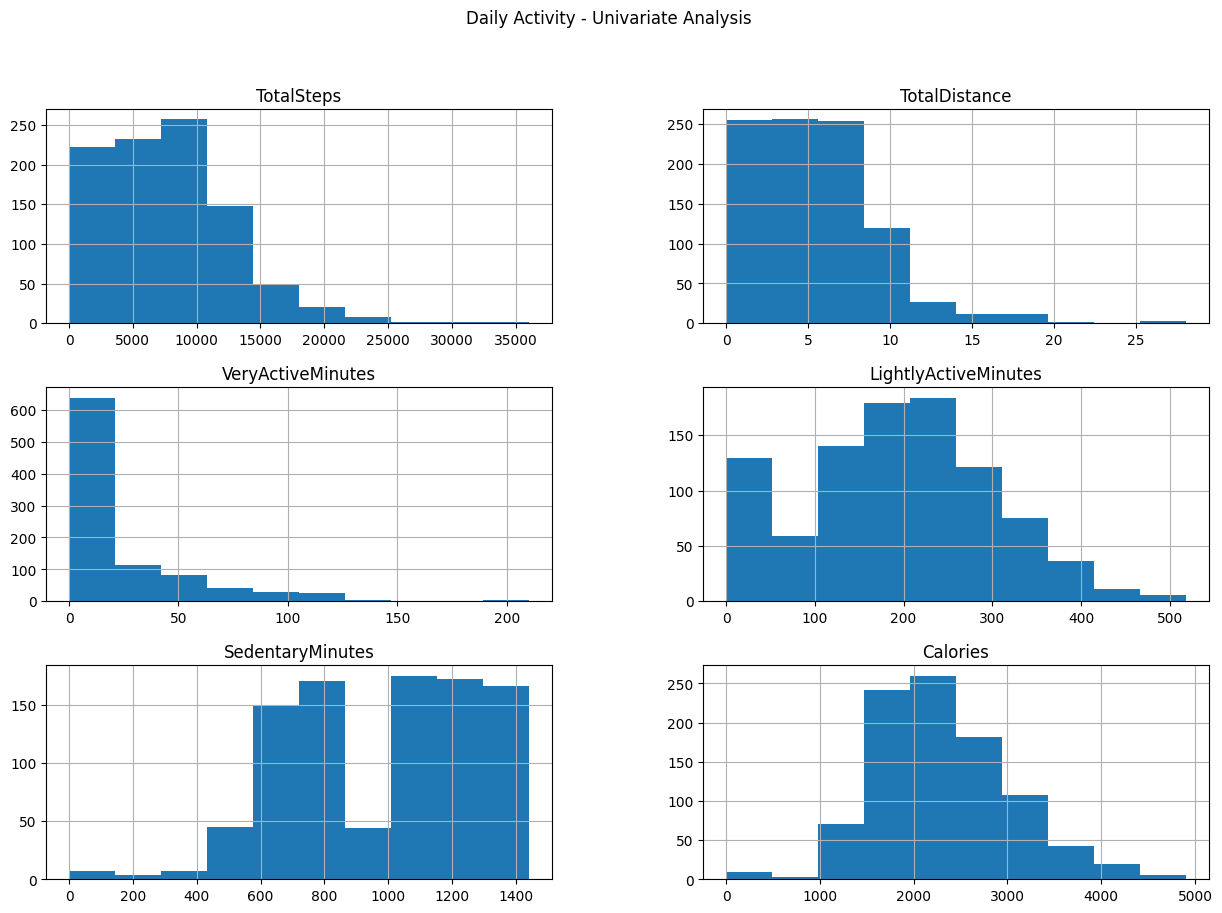

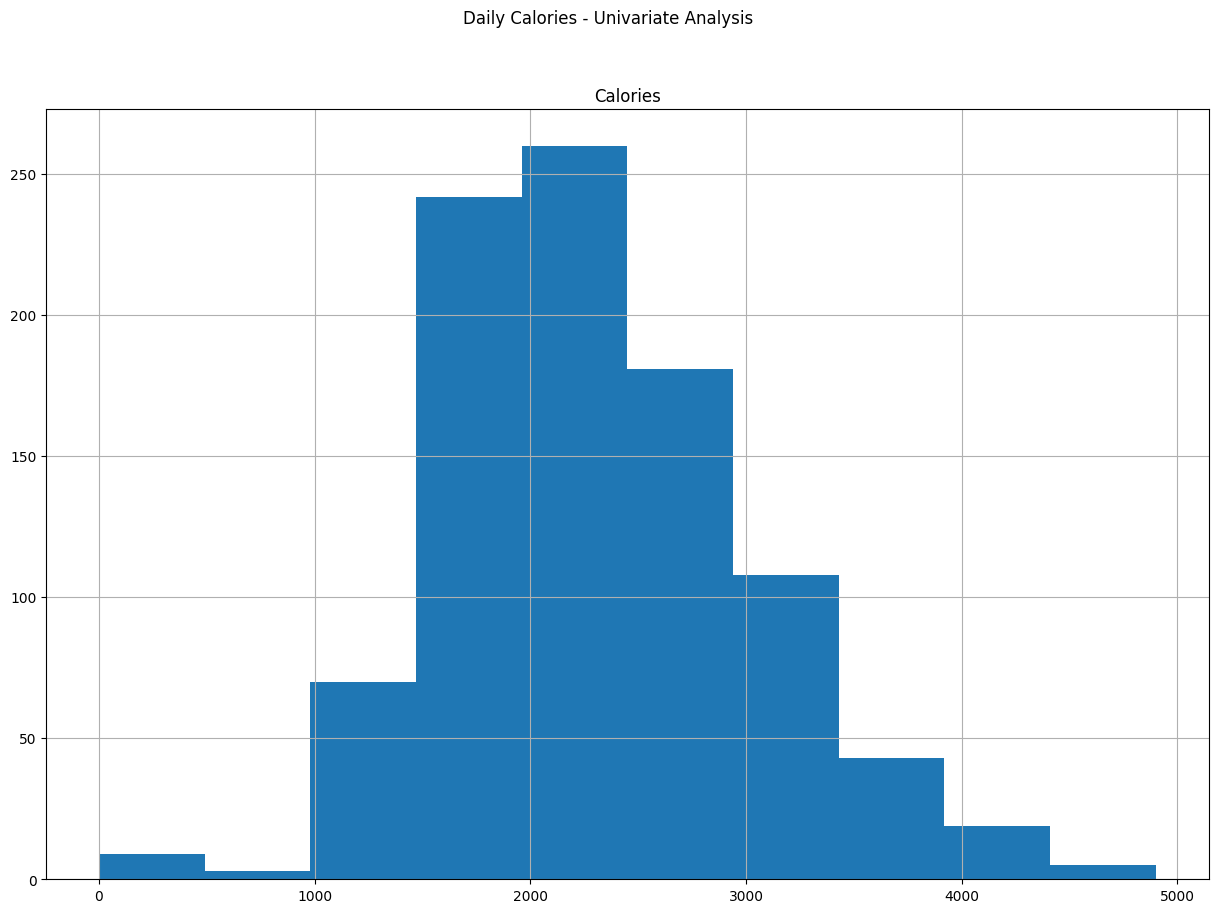

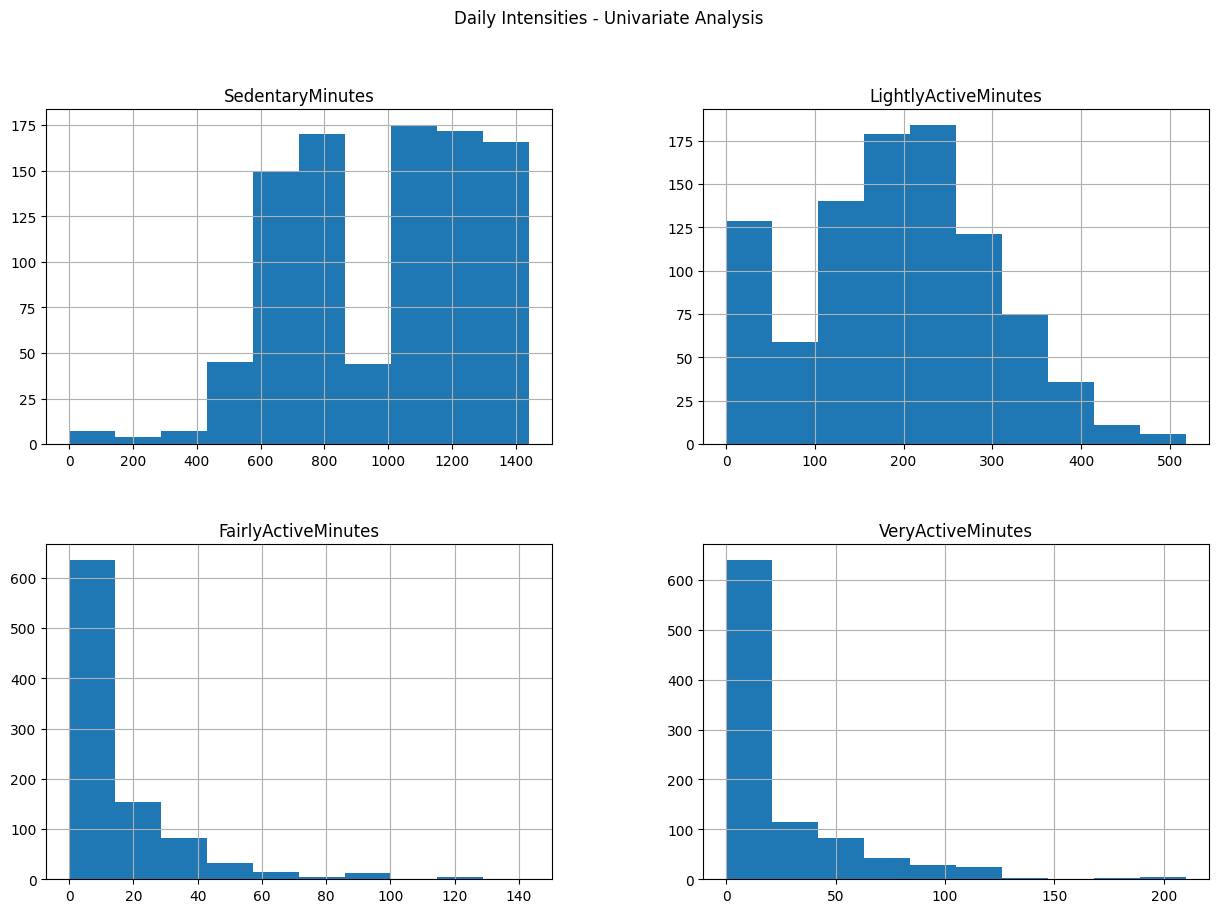

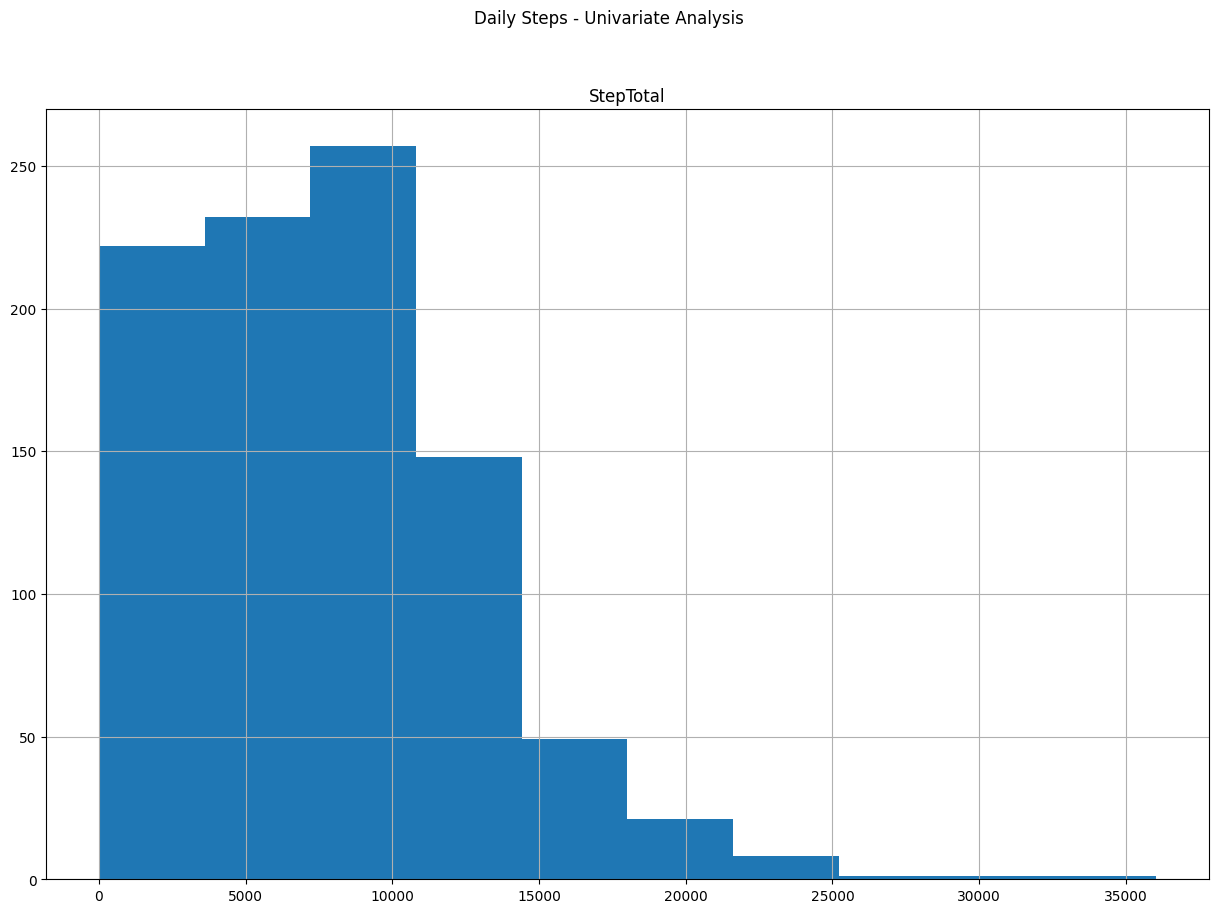

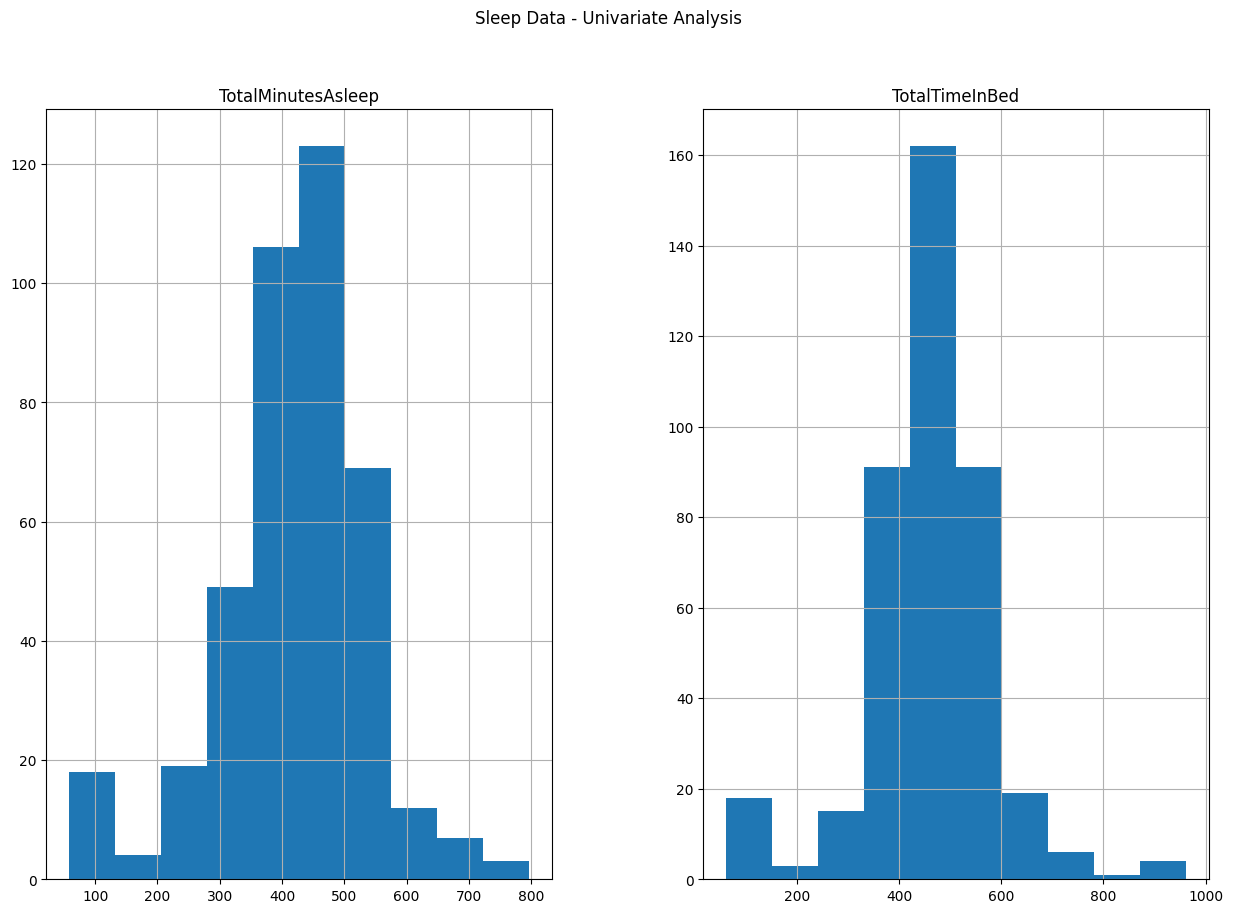

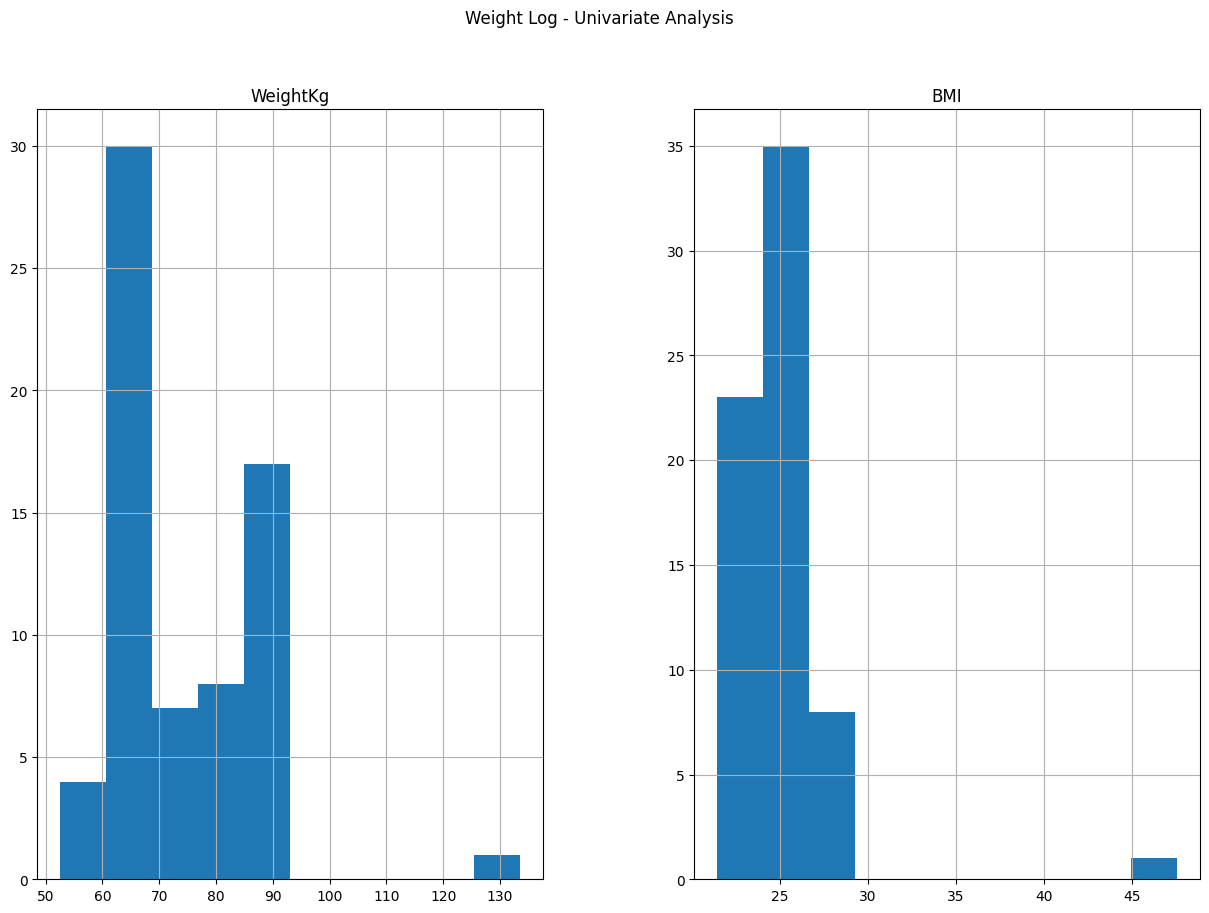

{'daily_activity':          TotalSteps  TotalDistance  VeryActiveMinutes  LightlyActiveMinutes  \
 count    940.000000     940.000000         940.000000            940.000000   
 mean    7637.910638       5.489702          21.164894            192.812766   
 std     5087.150742       3.924606          32.844803            109.174700   
 min        0.000000       0.000000           0.000000              0.000000   
 25%     3789.750000       2.620000           0.000000            127.000000   
 50%     7405.500000       5.245000           4.000000            199.000000   
 75%    10727.000000       7.712500          32.000000            264.000000   
 max    36019.000000      28.030001         210.000000            518.000000   
 
        SedentaryMinutes     Calories  
 count        940.000000   940.000000  
 mean         991.210638  2303.609574  
 std          301.267437   718.166862  
 min            0.000000     0.000000  
 25%          729.750000  1828.500000  
 50%         1057.50

In [11]:
import matplotlib.pyplot as plt

# Univariate analysis - Histograms and descriptive statistics for key variables

# Function to plot histograms for a dataframe
def plot_histograms(df, columns, title):
    df[columns].hist(figsize=(15, 10))
    plt.suptitle(title)
    plt.show()

# Daily Activity
plot_histograms(daily_activity, [
    'TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'
], "Daily Activity - Univariate Analysis")

# Daily Calories
plot_histograms(daily_calories, ['Calories'], "Daily Calories - Univariate Analysis")

# Daily Intensities
plot_histograms(daily_intensities, [
    'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes'
], "Daily Intensities - Univariate Analysis")

# Daily Steps
plot_histograms(daily_steps, ['StepTotal'], "Daily Steps - Univariate Analysis")

# Sleep Day
plot_histograms(sleep_day_cleaned, ['TotalMinutesAsleep', 'TotalTimeInBed'], "Sleep Data - Univariate Analysis")

# Weight Log
plot_histograms(weight_log_cleaned, ['WeightKg', 'BMI'], "Weight Log - Univariate Analysis")

# Descriptive statistics for key variables in all datasets
descriptive_stats = {
    "daily_activity": daily_activity[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].describe(),
    "daily_calories": daily_calories[['Calories']].describe(),
    "daily_intensities": daily_intensities[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].describe(),
    "daily_steps": daily_steps[['StepTotal']].describe(),
    "sleep_day": sleep_day_cleaned[['TotalMinutesAsleep', 'TotalTimeInBed']].describe(),
    "weight_log": weight_log_cleaned[['WeightKg', 'BMI']].describe()
}

descriptive_stats


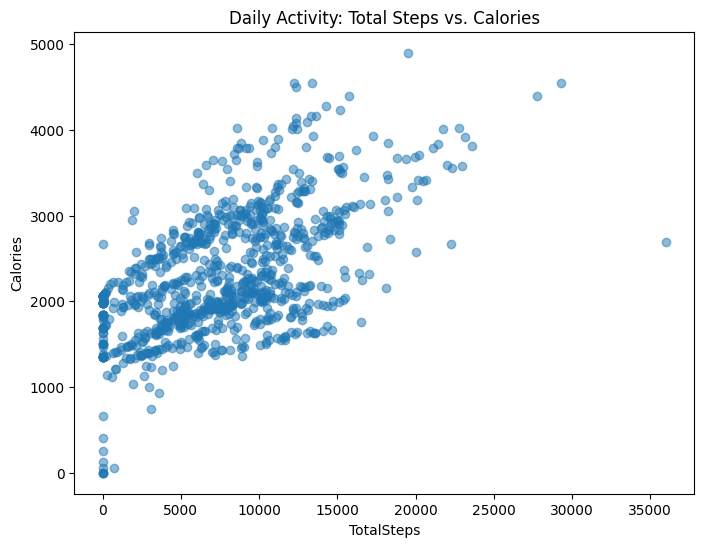

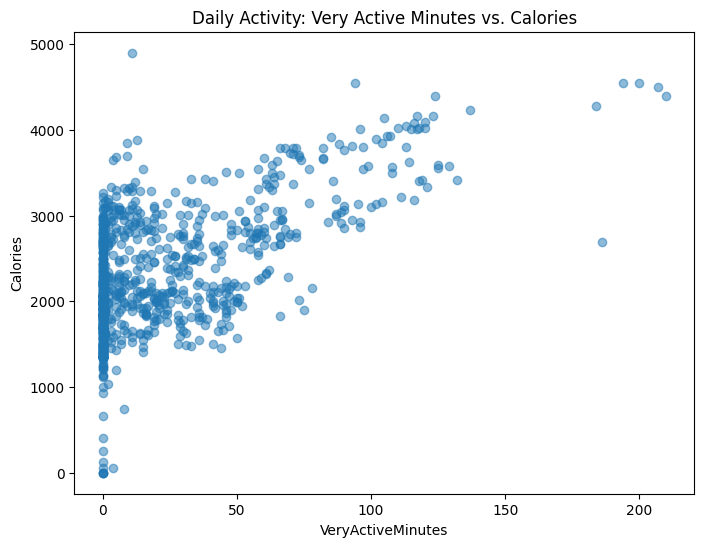

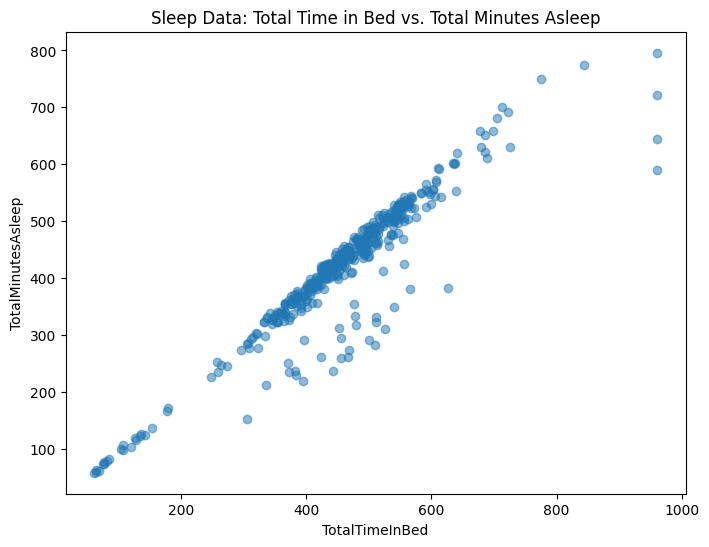

{'daily_activity':                                 Id  ActivityDate  TotalSteps  TotalDistance  \
 Id                        1.000000     -0.015571    0.185721       0.241000   
 ActivityDate             -0.015571      1.000000   -0.043931      -0.040169   
 TotalSteps                0.185721     -0.043931    1.000000       0.985369   
 TotalDistance             0.241000     -0.040169    0.985369       1.000000   
 TrackerDistance           0.238816     -0.038962    0.984822       0.999505   
 LoggedActivitiesDistance  0.188015     -0.033000    0.181849       0.188332   
 VeryActiveDistance        0.308691     -0.034487    0.740115       0.794582   
 ModeratelyActiveDistance  0.026665      0.037574    0.507105       0.470758   
 LightActiveDistance       0.019629     -0.036287    0.692208       0.662002   
 SedentaryActiveDistance  -0.015698      0.002254    0.070505       0.082389   
 VeryActiveMinutes         0.303608     -0.044200    0.667079       0.681297   
 FairlyActiveMinutes  

In [12]:
# Bivariate analysis - Scatter plots and correlation matrices

# Scatter plot function for bivariate analysis
def plot_scatter(df, x, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Daily Activity: Steps vs. Calories
plot_scatter(daily_activity, 'TotalSteps', 'Calories', "Daily Activity: Total Steps vs. Calories")

# Daily Activity: Very Active Minutes vs. Calories
plot_scatter(daily_activity, 'VeryActiveMinutes', 'Calories', "Daily Activity: Very Active Minutes vs. Calories")

# Sleep Data: Total Time in Bed vs. Total Minutes Asleep
plot_scatter(sleep_day_cleaned, 'TotalTimeInBed', 'TotalMinutesAsleep', "Sleep Data: Total Time in Bed vs. Total Minutes Asleep")

# Correlation matrices for datasets with multiple numeric variables
correlation_matrices = {
    "daily_activity": daily_activity.corr(),
    "daily_intensities": daily_intensities.corr(),
    "sleep_day": sleep_day_cleaned.corr(),
    "weight_log": weight_log_cleaned.corr()
}

correlation_matrices


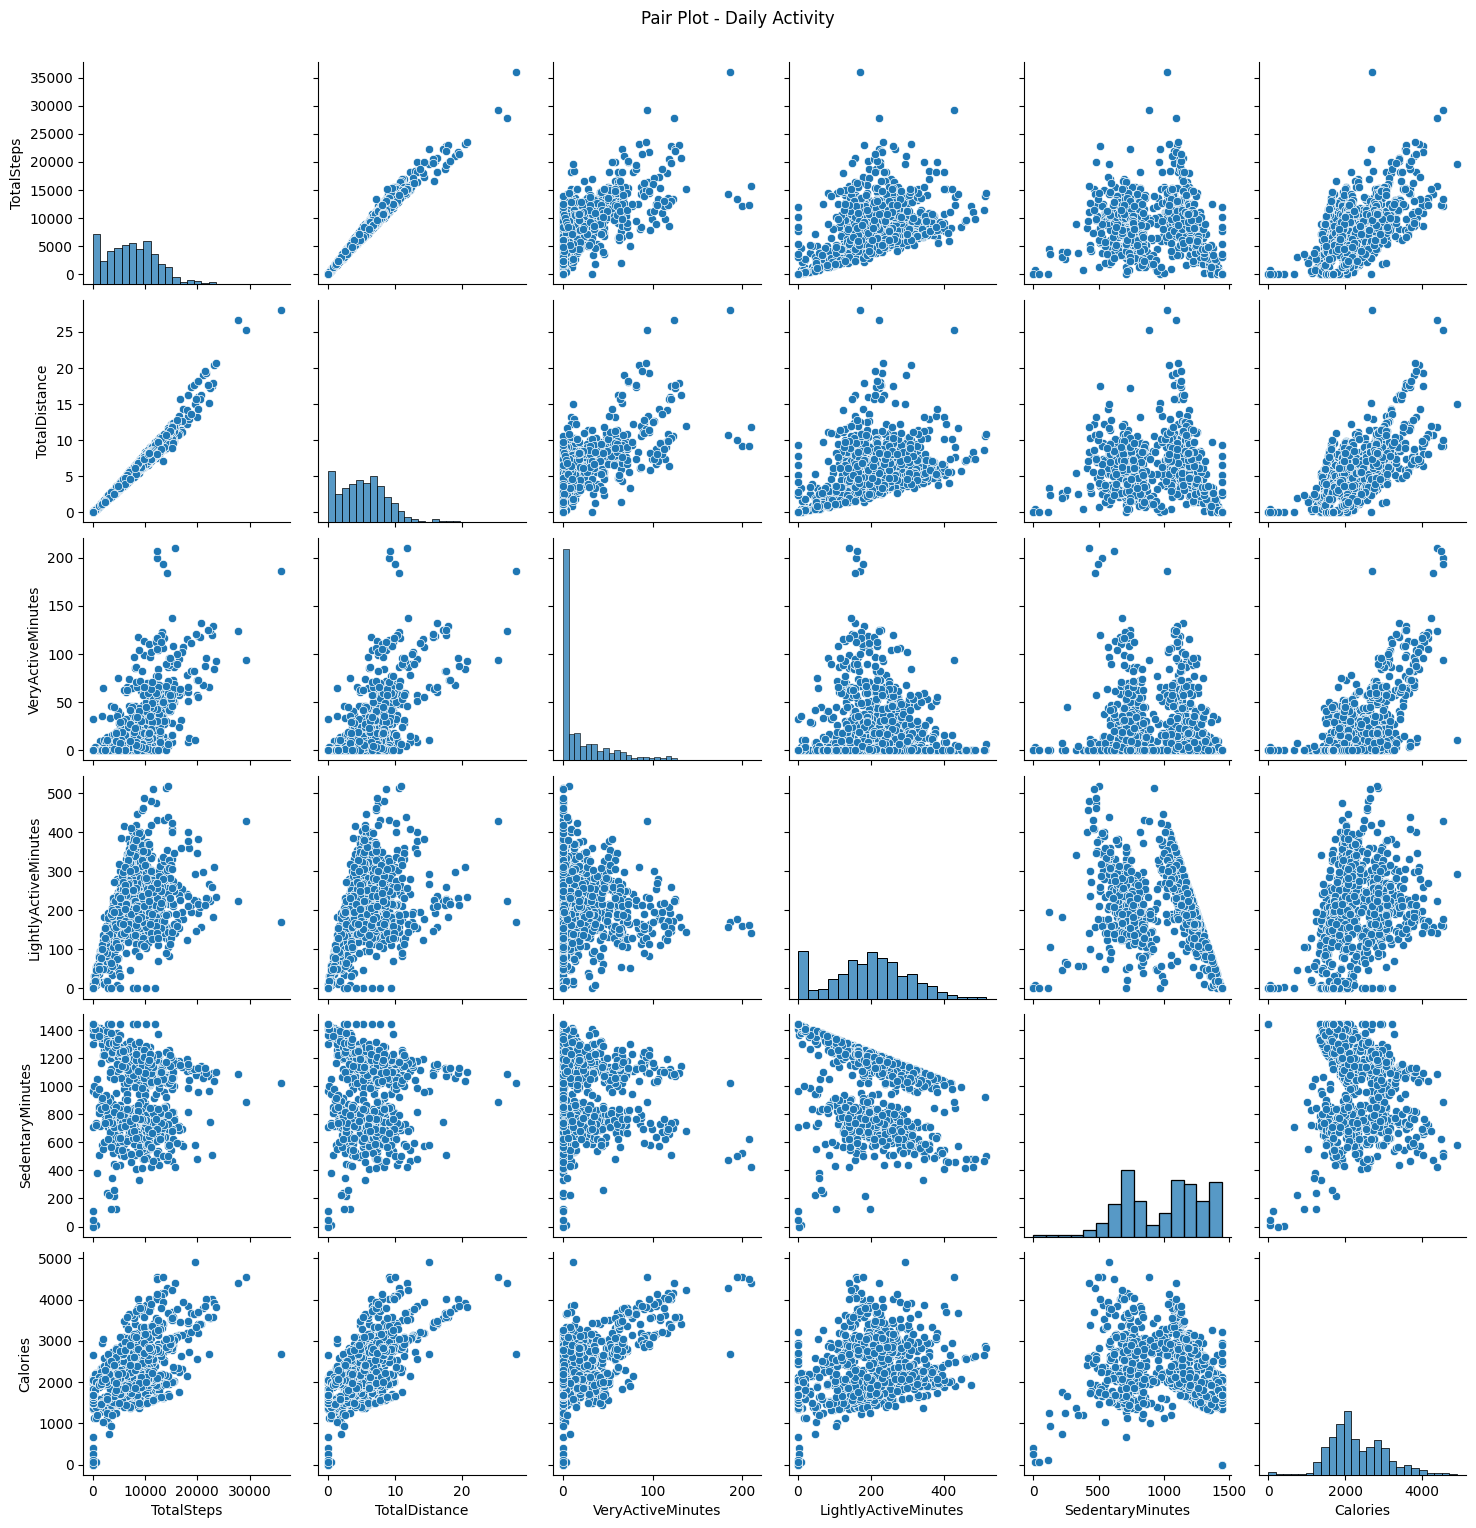

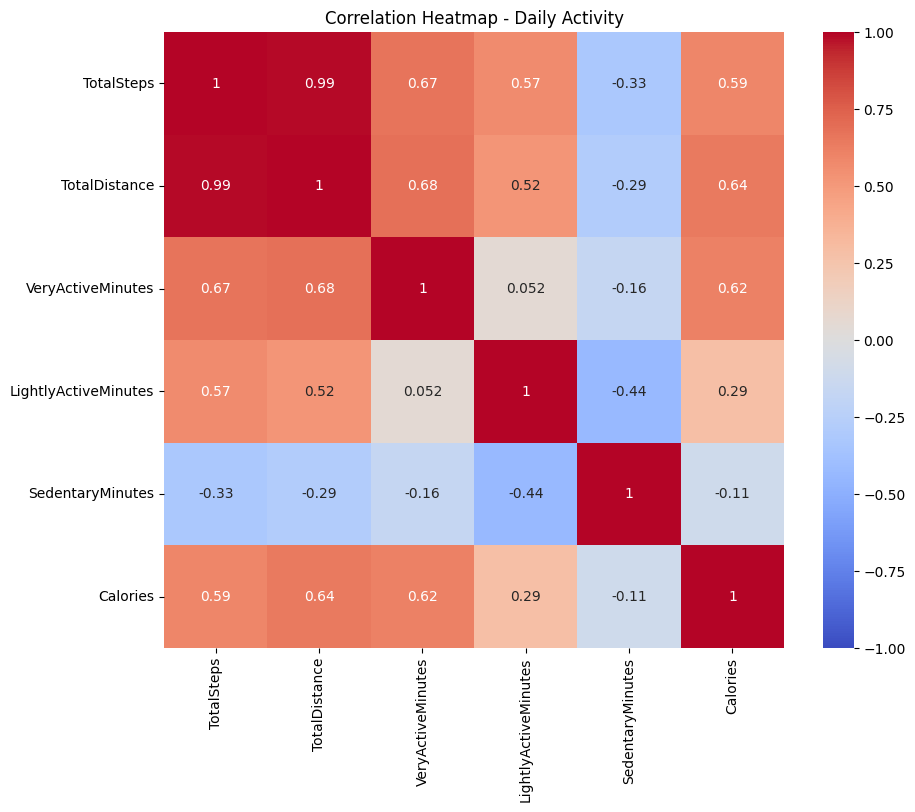

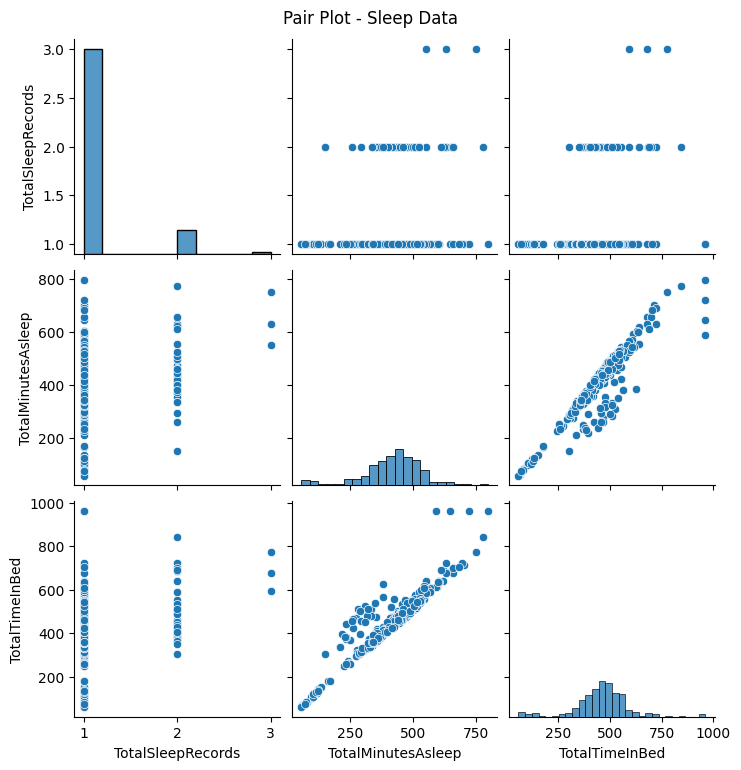

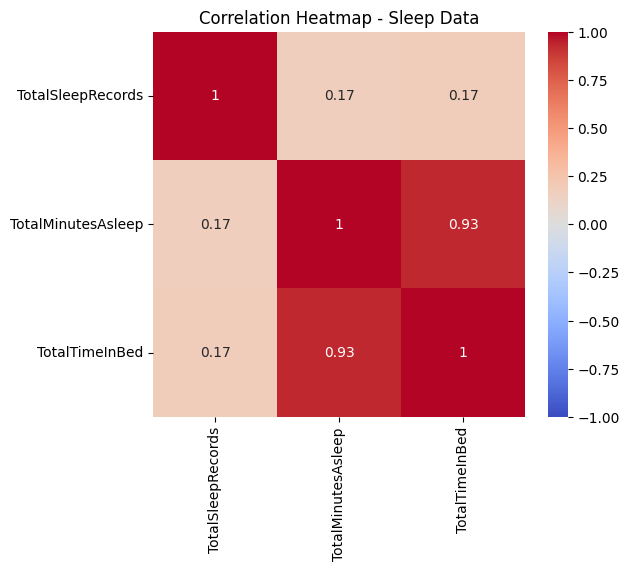

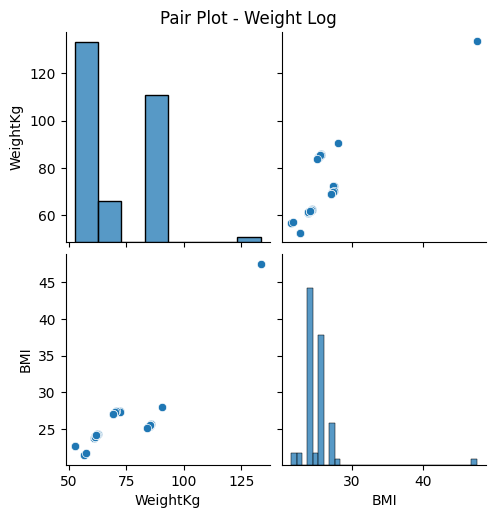

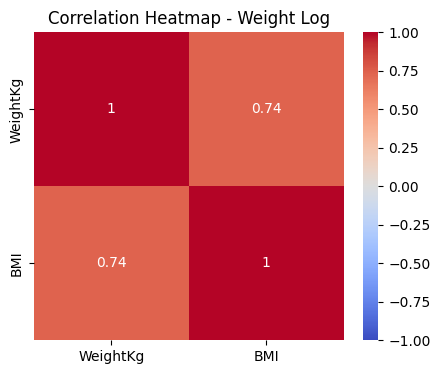

In [13]:
import seaborn as sns

# Multivariate analysis - Pair plots and heatmaps for complex interactions

# Pair plot for Daily Activity to explore multiple relationships
sns.pairplot(daily_activity[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']])
plt.suptitle("Pair Plot - Daily Activity", y=1.02)
plt.show()

# Heatmap for Daily Activity to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(daily_activity[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Daily Activity")
plt.show()

# Pair plot for Sleep Data to explore relationships between sleep metrics
sns.pairplot(sleep_day_cleaned[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']])
plt.suptitle("Pair Plot - Sleep Data", y=1.02)
plt.show()

# Heatmap for Sleep Data to visualize correlations
plt.figure(figsize=(6, 5))
sns.heatmap(sleep_day_cleaned[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Sleep Data")
plt.show()

# Pair plot for Weight Log to explore relationships between weight metrics
sns.pairplot(weight_log_cleaned[['WeightKg', 'BMI']])
plt.suptitle("Pair Plot - Weight Log", y=1.02)
plt.show()

# Heatmap for Weight Log to visualize correlations
plt.figure(figsize=(5, 4))
sns.heatmap(weight_log_cleaned[['WeightKg', 'BMI']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Weight Log")
plt.show()
